# Proyecto Clasificación de Imágenes: *Dogs vs Cats*

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
import tensorflow as tf


In [2]:
data_dir = os.path.abspath("./data")
dog_folder = os.path.join(data_dir, "dogs")
cat_folder = os.path.join(data_dir, "cats")
dog_names = os.listdir(dog_folder)
cat_names = os.listdir(cat_folder)

In [3]:
import cv2
import glob
import os

# Lista para almacenar las rutas de las imágenes y las etiquetas
X = [] #Imagenes
y = [] #Labels

# Enumerar las carpetas en la ruta del conjunto de datos
for clase in os.listdir(data_dir):
    # Construir la ruta completa de la carpeta de la clase
    ruta_clase = os.path.join(data_dir, clase)
    
    # Verificar si es una carpeta
    if os.path.isdir(ruta_clase):
        # Enumerar los archivos en la carpeta de la clase
        for imagen in glob.glob(os.path.join(ruta_clase, "*.jpg")):
            # Agregar la ruta de la imagen y la etiqueta correspondiente
            X.append(imagen)
            y.append(clase)

print(len(X))
print(len(y))

1100
1100


In [4]:
from PIL import Image

# Listas para almacenar las imágenes y las etiquetas
dog_images = []

# Procesar imágenes de perros
for dog in dog_names:
    img_path = os.path.join(dog_folder, dog)

    # Verificar si el archivo es una imagen
    if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        img = Image.open(img_path)
        target_size = (200, 200)
        img_resized = tf.image.resize(np.array(img), target_size)
        dog_images.append(img_resized)

# Convertir la lista de imágenes a un array de numpy
dog_images = np.array(dog_images)

# Imprimir el número de etiquetas de perros
print("Número de imagenes de perros:", len(dog_images))


Número de imagenes de perros: 550


In [5]:
from PIL import Image

# Listas para almacenar las imágenes y las etiquetas
cat_images = []

# Procesar imágenes de perros
for cat in cat_names:
    img_path = os.path.join(cat_folder, cat)

    # Verificar si el archivo es una imagen
    if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        img = Image.open(img_path)
        target_size = (200, 200)
        img_resized = tf.image.resize(np.array(img), target_size)
        cat_images.append(img_resized)

# Convertir la lista de imágenes a un array de numpy
cat_images = np.array(cat_images)

# Imprimir el número de etiquetas de perros
print("Número de imagenes de gatos:", len(cat_images))

Número de imagenes de gatos: 550


In [6]:
X = np.concatenate((dog_images, cat_images), axis=0)
X.shape

(1100, 200, 200, 3)

In [7]:
#Crear un diccionario de mapeo
mapeo = {"cat": 0, "dog": 1}

# Aplicar el mapeo a la lista de etiquetas
y = [mapeo[labels] for labels in y]

print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

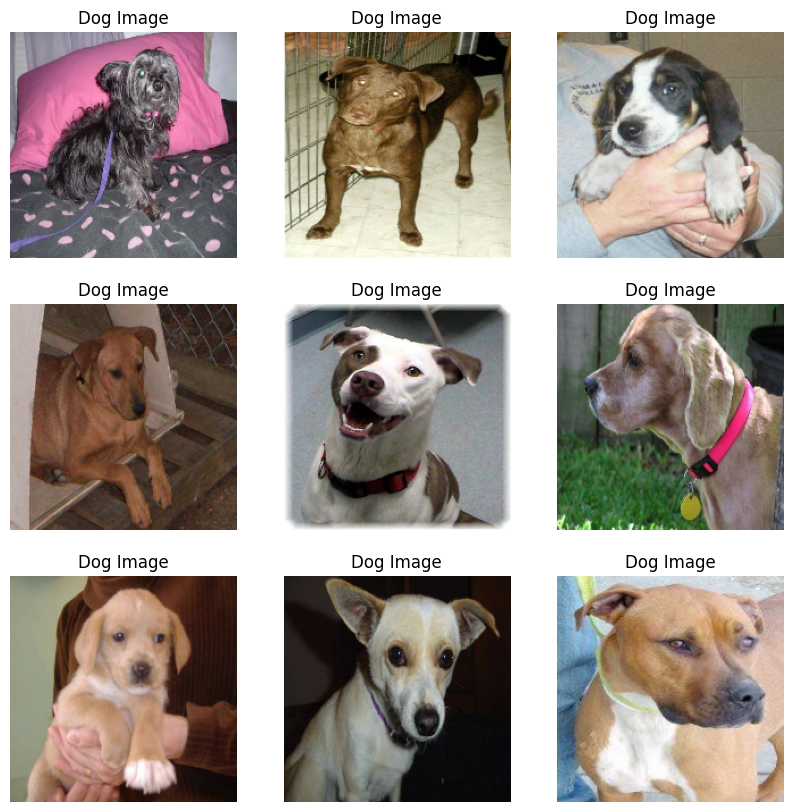

In [8]:
# Verificar si la lista de imágenes de perros está vacía
if len(dog_images) > 0:
    # Visualizar las primeras 9 imágenes de perros
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(dog_images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(dog_images[i].astype('uint8'))
        plt.title('Dog Image')
        plt.axis('off')
    plt.show()
else:
    print("No se cargaron imágenes de perros.")

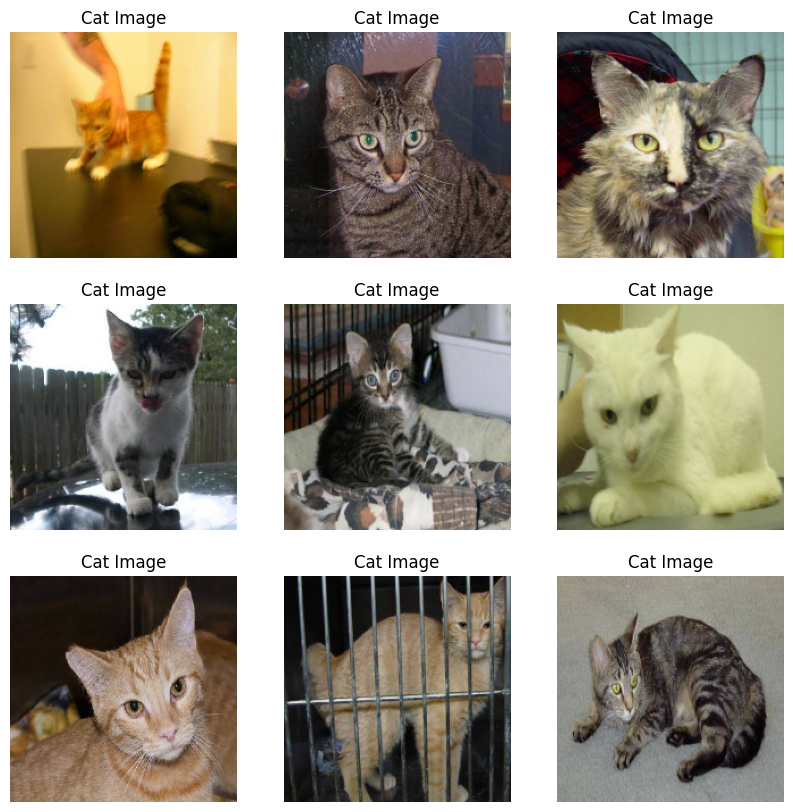

In [9]:
# Verificar si la lista de imágenes de perros está vacía
if len(cat_images) > 0:
    # Visualizar las primeras 9 imágenes de perros
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(cat_images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cat_images[i].astype('uint8'))
        plt.title('Cat Image')
        plt.axis('off')
    plt.show()
else:
    print("No se cargaron imágenes de gatos.")

In [10]:
X = np.array(X).astype(float) / 255
y = np.array(y)

X.shape

(1100, 200, 200, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Crear el generador de imágenes para el conjunto de entrenamiento
datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # El 80% es para entrenamiento

# Crear el generador de imágenes para el conjunto de prueba
datagen_test = ImageDataGenerator(rescale=1./255)  # El 20% es para prueba

# Ajustar el generador de imágenes al conjunto de entrenamiento
train_generator = datagen_train.flow(X_train, y_train, subset='training', batch_size=32, seed=42)

# Ajustar el generador de imágenes al conjunto de validación
validation_generator = datagen_train.flow(X_train, y_train, subset='validation', batch_size=32, seed=42)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Usuario\anaconda3\envs\darconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
from keras.optimizers import Adam

model.compile(loss = keras.losses.binary_crossentropy, optimizer = Adam(learning_rate = 0.01), metrics = ["accuracy"])


In [15]:
for batch_images, batch_labels in train_generator:
    print("Batch labels:", batch_labels)
    break

Batch labels: [1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1]


In [16]:
model.fit(train_generator, epochs = 30)

Epoch 1/30


c:\Users\Usuario\anaconda3\envs\darconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.4880 - loss: 7249980.5000
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 183s 8s/step - accuracy: 0.5513 - loss: 3210.8130
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 184s 8s/step - accuracy: 0.4951 - loss: 377.8785
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 183s 8s/step - accuracy: 0.5274 - loss: 0.6927
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 183s 8s/step - accuracy: 0.4984 - loss: 0.6940
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.5124 - loss: 0.6937
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.5351 - loss: 0.6910
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.5528 - loss: 0.6889
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.5507 - loss: 0.6894
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.4893 - loss: 0.6955
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.5616 - loss: 0.6904
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy:

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_generator, steps_per_epoch = 100, validation_data = validation_generator, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
 22/100 ━━━━━━━━━━━━━━━━━━━━ 13:25 10s/step - accuracy: 0.5066 - loss: 0.6935
Epoch 1: val_accuracy improved from -inf to 0.44318, saving model to ../models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.5214 - loss: 0.6688 - val_accuracy: 0.4432 - val_loss: 0.6001
Epoch 2/3
 22/100 ━━━━━━━━━━━━━━━━━━━━ 16:35 13s/step - accuracy: 0.5472 - loss: 0.6898
Epoch 2: val_accuracy did not improve from 0.44318
100/100 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.5303 - loss: 0.6684 - val_accuracy: 0.4432 - val_loss: 0.6025
Epoch 3/3
 22/100 ━━━━━━━━━━━━━━━━━━━━ 16:11 12s/step - accuracy: 0.5648 - loss: 0.6874
Epoch 3: val_accuracy did not improve from 0.44318
100/100 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.5342 - loss: 0.6677 - val_accuracy: 0.4432 - val_loss: 0.6013


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5816\3854291049.py:4: SyntaxWarning: invalid escape sequence '\c'
  img = image.load_img("cats_vs_dogs\cat\cat.3515.jpg", target_size = (200, 200))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
cat


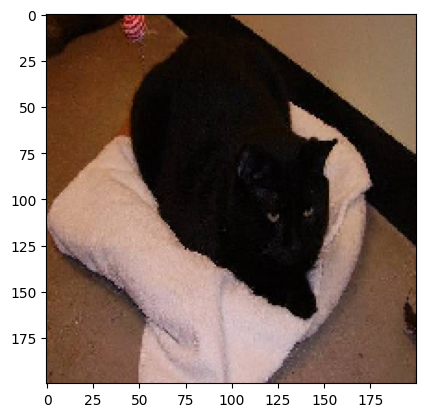

In [28]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("cats_vs_dogs\cat\cat.3515.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.keras")
output = saved_model.predict(img)
predicted_class = np.argmax(output)
if predicted_class == 0:
    print("cat")
else:
    print("dog")